# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [3]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007
# Calculate means and standard deviations for males
male_height_mean = male_df['Height'].mean()
male_height_sd = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()

# Calculate means and standard deviations for females
female_height_mean = female_df['Height'].mean()
female_height_sd = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()

male_height_mean, male_height_sd, male_weight_mean, male_weight_sd, female_height_mean, female_height_sd, female_weight_mean, female_weight_sd

(69.02634590621741,
 2.863362228660651,
 187.0206206581932,
 19.781154516763813,
 63.70877360342507,
 2.696284015765055,
 135.86009300746835,
 19.02246780531901)

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

In [ ]:
# Record your observations - are these inline with your personal observations?


Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660651
Male Weight mean: 187.0206206581932
Male Weight sd: 19.781154516763813
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765055
Female Weight mean: 135.86009300746835
Female Weight sd: 19.02246780531901


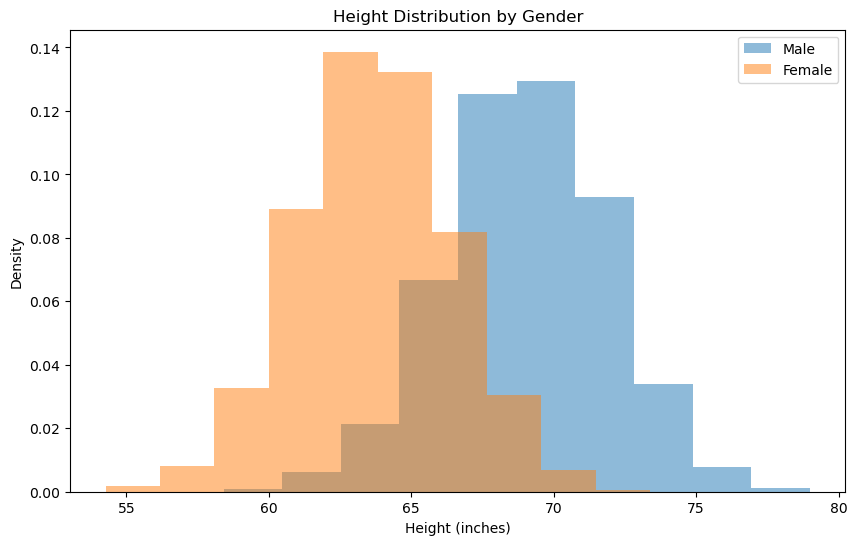

In [6]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset


# Separate data for males and females
male_df = data[data['Gender'] == 'Male']
female_df = data[data['Gender'] == 'Female']

# Calculate means and standard deviations for males
male_height_mean = male_df['Height'].mean()
male_height_sd = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()

# Calculate means and standard deviations for females
female_height_mean = female_df['Height'].mean()
female_height_sd = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()

# Print calculated values
print(f"Male Height mean: {male_height_mean}")
print(f"Male Height sd: {male_height_sd}")
print(f"Male Weight mean: {male_weight_mean}")
print(f"Male Weight sd: {male_weight_sd}")
print(f"Female Height mean: {female_height_mean}")
print(f"Female Height sd: {female_height_sd}")
print(f"Female Weight mean: {female_weight_mean}")
print(f"Female Weight sd: {female_weight_sd}")

# Plot histograms for male and female heights
plt.figure(figsize=(10, 6))
plt.hist(male_df['Height'], bins=10, alpha=0.5, label='Male', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.5, label='Female', density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.title('Height Distribution by Gender')
plt.legend()
plt.show()


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [7]:
def density(x):
    
    pass


# Generate test data and test the function - uncomment to run the test
# np.random.seed(5)
# mu, sigma = 0, 0.1 # mean and standard deviation
# s = np.random.normal(mu, sigma, 100)
# x,y = density(s)
# plt.plot(x,y, label = 'test')
# plt.legend()

## Add overlapping density plots to the histograms plotted earlier

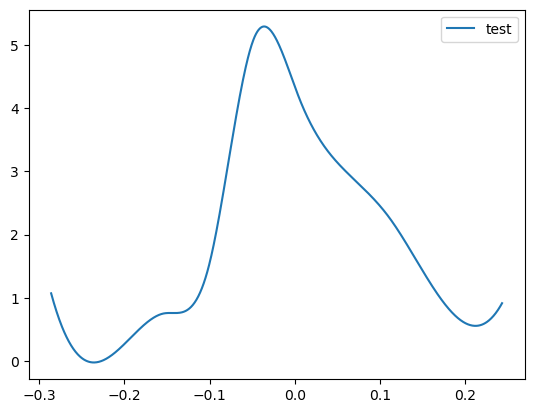

In [8]:
# Your code here 
import numpy as np
from scipy.interpolate import interp1d

def density(x, bins=10):
    hist, bin_edges = np.histogram(x, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    density_function = interp1d(bin_centers, hist, kind='cubic', fill_value="extrapolate")
    x_new = np.linspace(min(x), max(x), 1000)
    y_new = density_function(x_new)
    return x_new, y_new

# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x, y = density(s)
plt.plot(x, y, label='test')
plt.legend()
plt.show()


## Repeat the above exercise for male and female weights

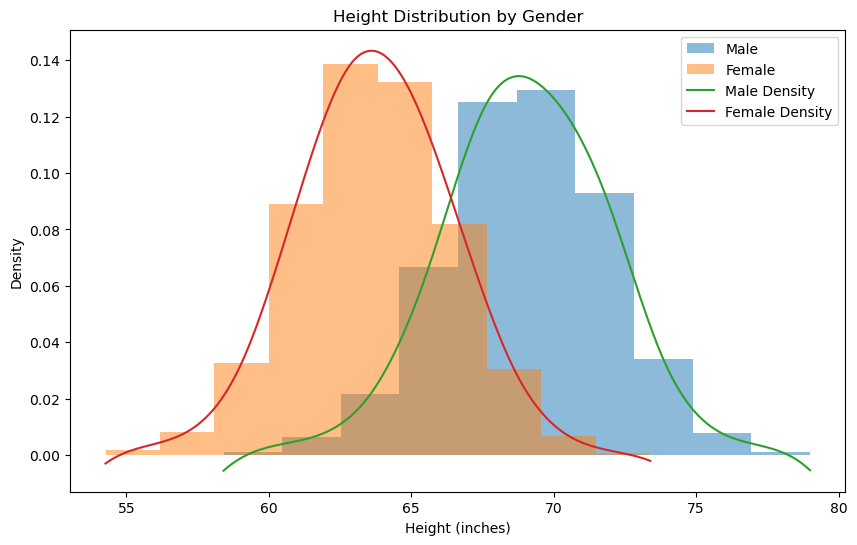

In [9]:
# Your code here 
# Plot histograms and density plots for male and female heights
plt.figure(figsize=(10, 6))
plt.hist(male_df['Height'], bins=10, alpha=0.5, label='Male', density=True)
plt.hist(female_df['Height'], bins=10, alpha=0.5, label='Female', density=True)

male_height_x, male_height_y = density(male_df['Height'])
female_height_x, female_height_y = density(female_df['Height'])

plt.plot(male_height_x, male_height_y, label='Male Density')
plt.plot(female_height_x, female_height_y, label='Female Density')

plt.xlabel('Height (inches)')
plt.ylabel('Density')
plt.title('Height Distribution by Gender')
plt.legend()
plt.show()


## Write your observations in the cell below

In [11]:
# Record your observations - are these inline with your personal observations?
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# What is the takeaway when comparing male and female heights and weights?

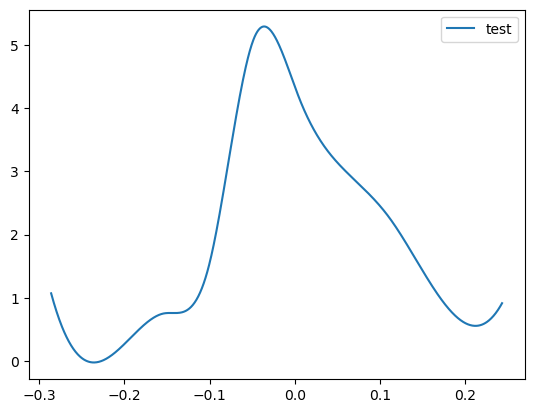

In [12]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.
def density(x, bins=10):
    hist, bin_edges = np.histogram(x, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    density_function = interp1d(bin_centers, hist, kind='cubic', fill_value="extrapolate")
    x_new = np.linspace(min(x), max(x), 1000)
    y_new = density_function(x_new)
    return x_new, y_new

# Generate test data and test the function
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x, y = density(s)
plt.plot(x, y, label='test')
plt.legend()
plt.show()
#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

(array([8.72491941e-05, 6.54368956e-04, 3.54813389e-03, 1.01936142e-02,
        1.81042078e-02, 2.02708961e-02, 1.28547146e-02, 5.51124076e-03,
        1.27965485e-03, 2.03581453e-04]),
 array([ 64.70012671,  78.45383542,  92.20754412, 105.96125282,
        119.71496152, 133.46867023, 147.22237893, 160.97608763,
        174.72979633, 188.48350504, 202.23721374]),
 <BarContainer object of 10 artists>)

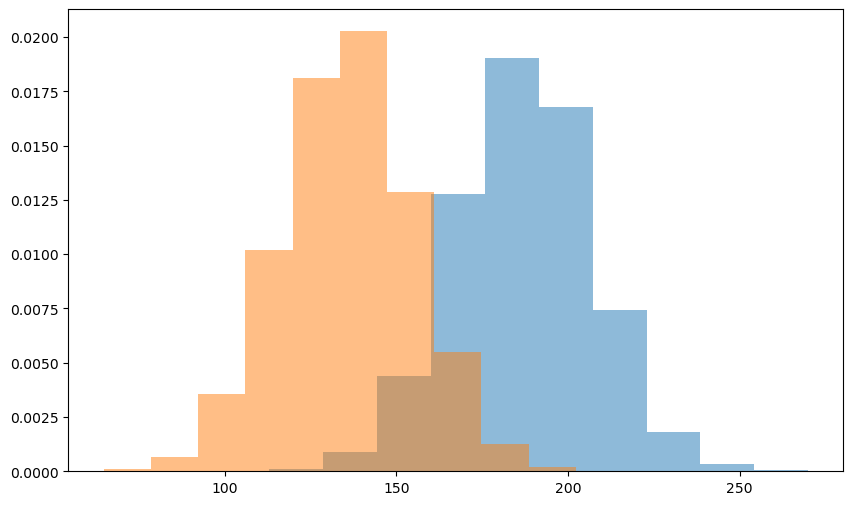

In [13]:
# Code for heights here
# Plot histograms and density plots for male and female weights
plt.figure(figsize=(10, 6))
plt.hist(male_df['Weight'], bins=10, alpha=0.5, label='Male', density=True)
plt.hist(female_df['Weight'], bins=10, alpha=0.5, label='Female', density=True)


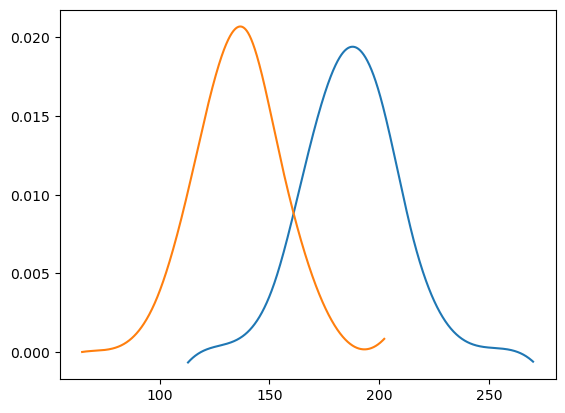

In [14]:
# Code for weights here
male_weight_x, male_weight_y = density(male_df['Weight'])
female_weight_x, female_weight_y = density(female_df['Weight'])

plt.plot(male_weight_x, male_weight_y, label='Male Density')
plt.plot(female_weight_x, female_weight_y, label='Female Density')

In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

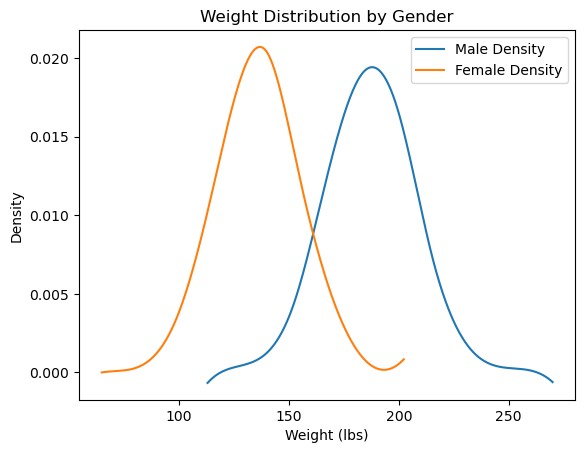

In [16]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)

plt.plot(male_weight_x, male_weight_y, label='Male Density')
plt.plot(female_weight_x, female_weight_y, label='Female Density')

plt.xlabel('Weight (lbs)')
plt.ylabel('Density')
plt.title('Weight Distribution by Gender')
plt.legend()
plt.show()

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.